In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.stats as stats
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2 
from sklearn.preprocessing import MinMaxScaler

In [2]:
df= pd.read_csv('Compiled_descriptors.csv')

In [3]:
df=df.iloc[:,1:]

In [4]:
x=df.drop('Class',axis=1)
y=df['Class']

In [5]:
scalar=MinMaxScaler((0,4))

In [6]:
scaled_data=scalar.fit_transform(x,y)

In [7]:
new_df=pd.DataFrame(scaled_data, columns=df.columns[:-1])

In [8]:
new_df['Class']=df['Class']

<Axes: xlabel='Class'>

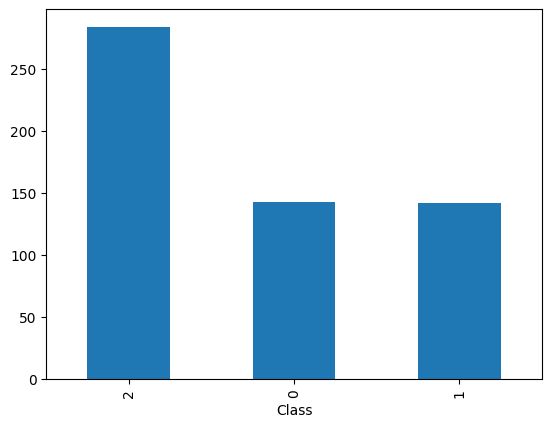

In [9]:
new_df['Class'].value_counts().plot(kind='bar')

In [11]:
pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [12]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter

In [13]:
x=new_df.drop('Class',axis=1)
y=new_df['Class']

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)


In [15]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

In [53]:
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [17]:
chi2_values, p_values = chi2(new_df.drop('Class', axis=1), new_df['Class'])

In [25]:
chi2_df = pd.DataFrame({
    'Feature': new_df.drop('Class', axis=1).columns,
    'Chi2 Value': chi2_values,
    'P-Value': p_values
})


In [29]:
chi2_df

,Feature,Chi2 Value,P-Value
0,MW,0.404383,0.816939
1,AMW,2.765649,0.250869
2,Sv,0.305823,0.858206
3,Mv,0.488554,0.783271
4,Me,3.560913,0.168561
...,...,...,...
732,DLS_04,1.960932,0.375136
733,DLS_06,0.587180,0.745582
734,DLS_cons,0.276097,0.871057
735,LLS_01,0.745120,0.688968


In [42]:
mask1=chi2_df['P-Value']<=0.05
mask2=chi2_df['Chi2 Value']>=20

In [43]:
j=chi2_df[mask1&mask2]['Feature'].tolist()

In [44]:
len(j)

30

In [45]:
final_df=new_df[j]

In [47]:
final_df['Class']=new_df['Class']

C:\Users\Akshat\AppData\Local\Temp\ipykernel_3636\695168134.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Class']=new_df['Class']


In [48]:
final_df

,nF,nX,P_VSA_ppp_hal,SM03_EA(dm),nR=Cs,nR=Ct,C-005,C-006,C-016,H-053,...,F05[C-S],F05[N-N],F05[N-F],F06[C-F],F07[C-F],F07[C-Br],F09[C-F],F09[N-F],F10[C-F],Class
0,0.0,0.000000,0.0,1.627426,1.333333,0.000000,0.000000,0.000000,1.333333,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.000000,0.0,0.000000,4.000000,0.000000,1.333333,0.000000,3.333333,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.000000,0.0,0.000000,2.666667,1.333333,0.000000,0.000000,2.666667,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.266667,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,0.0,0.666667,1.0,0.000000,0.000000,0.000000,0.000000,0.266667,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
565,0.0,0.000000,0.0,0.587702,2.000000,0.000000,0.000000,0.533333,2.000000,0.0,...,0.727273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
566,0.0,0.000000,0.0,0.413568,0.000000,0.000000,2.666667,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
567,0.0,0.000000,0.0,2.588790,0.000000,0.000000,0.000000,1.600000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [49]:
x=final_df.drop('Class',axis=1)
y=final_df['Class']

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [51]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

In [56]:
lst=[]

In [57]:
cw={}
clf1=RandomForestClassifier(n_estimators=1000, n_jobs=1, bootstrap=False, max_depth=70)
clf2=GradientBoostingClassifier(n_estimators=500)
clf3=LogisticRegression(max_iter=4500)
clf4=AdaBoostClassifier(n_estimators=500)
clf5=SVC(probability = True, max_iter = 2000, class_weight = cw)
clf6=KNeighborsClassifier(n_neighbors=20)

In [58]:
lst.append(np.mean(cross_val_score(clf1,x_train_smote,y_train_smote,cv=10,scoring='accuracy')))
lst.append(np.mean(cross_val_score(clf2,x_train_smote,y_train_smote,cv=10,scoring='accuracy')))
lst.append(np.mean(cross_val_score(clf3,x_train_smote,y_train_smote,cv=10,scoring='accuracy')))
lst.append(np.mean(cross_val_score(clf4,x_train_smote,y_train_smote,cv=10,scoring='accuracy')))
lst.append(np.mean(cross_val_score(clf5,x_train_smote,y_train_smote,cv=10,scoring='accuracy')))
lst.append(np.mean(cross_val_score(clf6,x_train_smote,y_train_smote,cv=10,scoring='accuracy')))

C:\Users\Akshat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Akshat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Akshat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent

In [59]:
lst

[0.8062233589087808,
 0.7797527706734868,
 0.5962063086104006,
 0.5801364023870417,
 0.652003410059676,
 0.6432438192668373]